# Project: Water sustainabilty
# Team Members: Kishor Desai and Puneeth H S


## Module Imports

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [376]:
import numpy as np

In [377]:
df = pd.read_csv('./data.csv')

## Information about Dataset

The Dataset "Bengaluru Water Tanker Data - 2024" is taken from OpenCity - Urban Data Portal

Number of Rows = 160  
Number of Cols = 17

Columns of Interest = "What is your community's monthly expense on water" & "How many private tankers do you get per month on average?"

Link to Dataset = https://data.opencity.in/dataset/bengaluru-tanker-water-data/resource/water-tanker-data-%282024%29

## Data Pre-processing

### Overview of Data

In [378]:
print(df.shape)
print(df.columns)

(160, 17)
Index(['Sources of water supply for your community',
       'If you don't get water from tankers, what do you rely on for water needs?',
       'How much do you pay for a single tanker of water?',
       'What is the capacity of the tanker in litres?', 'Your area Pincode',
       'Type of Community', 'Frequency of purchase of private water tanker',
       'How many private tankers do you get per month on average?',
       'Number of units in the community', 'Do you have water rationing?',
       'Do you use treated STP water for flushing/gardening? ',
       'What is your community's monthly expense on water?',
       'Number of dry days in the past year?',
       'Have you been ordering private water tankers more often in the last three months? ',
       'Has the supply of water from BWSSB changed during the last one year (both in terms of frequency as well as quantity)? ',
       'How much were you paying for the same tanker of water a year back (Feb 2023)?',
       'How of

In [379]:
df.sample(5)

,Sources of water supply for your community,"If you don't get water from tankers, what do you rely on for water needs?",How much do you pay for a single tanker of water?,What is the capacity of the tanker in litres?,Your area Pincode,Type of Community,Frequency of purchase of private water tanker,How many private tankers do you get per month on average?,Number of units in the community,Do you have water rationing?,Do you use treated STP water for flushing/gardening?,What is your community's monthly expense on water?,Number of dry days in the past year?,Have you been ordering private water tankers more often in the last three months?,Has the supply of water from BWSSB changed during the last one year (both in terms of frequency as well as quantity)?,How much were you paying for the same tanker of water a year back (Feb 2023)?,How often does your water tanker vendor raise rates?
51,"Private water tankers, BWSSB/Municipal/Cauvery...",NaN,1200,6000,560062,Individual Houses,Weekly,10,500,Yes,NaN,900000,Nil,More often,Reduced,400.0,Every quarter
4,"Private water tankers, BWSSB/Municipal/Cauvery...",NaN,800,6000,560023,Apartments,Daily,600,703,No,NaN,800000,2,More often,No change,550.0,Every 6 months
113,BWSSB/Municipal/Cauvery Water,NaN,1000,5000,560093,Apartments,Only for Emergency,0,159,No,NaN,90000,Alternate days - except Sat Sun,Not ordered private tankers in last 3 months,No change,800.0,We have been very infrequent buyers of tanker ...
70,"Private water tankers, BWSSB/Municipal/Cauvery...",NaN,2000,13000,560066,Apartments,Daily,25,21,Yes,NaN,50000,0,More often,Reduced,1600.0,As & when he feels
6,"Private water tankers, BWSSB/Municipal/Cauvery...",NaN,900,6000,560026,Apartments,Daily,45,32,No,NaN,41000,60,More often,Reduced,800.0,Every 6 months


### Dealing with NaN values and columns

In [380]:
print(df.isna().sum()/len(df)*100)

Sources of water supply for your community                                                                                  0.000
If you don't get water from tankers, what do you rely on for water needs?                                                 100.000
How much do you pay for a single tanker of water?                                                                           0.000
What is the capacity of the tanker in litres?                                                                               0.000
Your area Pincode                                                                                                           0.000
Type of Community                                                                                                           0.000
Frequency of purchase of private water tanker                                                                               0.000
How many private tankers do you get per month on average?                                 

In [381]:
df.drop(columns=["If you don't get water from tankers, what do you rely on for water needs?","Do you use treated STP water for flushing/gardening? "],inplace=True)

In [382]:
df.dropna(inplace=True)

In [383]:
print(df.isna().sum()/len(df)*100)

Sources of water supply for your community                                                                                0.0
How much do you pay for a single tanker of water?                                                                         0.0
What is the capacity of the tanker in litres?                                                                             0.0
Your area Pincode                                                                                                         0.0
Type of Community                                                                                                         0.0
Frequency of purchase of private water tanker                                                                             0.0
How many private tankers do you get per month on average?                                                                 0.0
Number of units in the community                                                                                      

### Fixing data-types of columns

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 1 to 159
Data columns (total 15 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Sources of water supply for your community                                                                              102 non-null    object 
 1   How much do you pay for a single tanker of water?                                                                       102 non-null    int64  
 2   What is the capacity of the tanker in litres?                                                                           102 non-null    int64  
 3   Your area Pincode                                                                                                       102 non-null    int64  
 4   T

In [385]:
for column in df.columns:
    if df[column].dtype=='object':
        print(f"Column = {column}\n\tUnique entries = {df[column].unique().tolist()}")

Column = Sources of water supply for your community
	Unique entries = ['Private water tankers, Borewell', 'Private water tankers, BWSSB/Municipal/Cauvery Water, Borewell, STP treated water', 'Private water tankers, BWSSB/Municipal/Cauvery Water, Borewell', 'Private water tankers, BWSSB/Municipal/Cauvery Water, STP treated water', 'BWSSB/Municipal/Cauvery Water, Borewell', 'Private water tankers, Borewell, STP treated water', 'Private water tankers', 'Private water tankers, Borewell, STP treated water, Rain water harvesting', 'Private water tankers, STP treated water', 'Private water tankers, BWSSB/Municipal/Cauvery Water', 'Borewell', 'BWSSB/Municipal/Cauvery Water']
Column = Type of Community
	Unique entries = ['Apartments', 'Villas', 'Individual Houses']
Column = Frequency of purchase of private water tanker
	Unique entries = ['Daily', 'Weekly', 'Only for Emergency']
Column = Number of units in the community
	Unique entries = ['30', '120', '356', '703', '32', '83', '819', '125', '108

In [386]:
df.drop(columns=["Number of dry days in the past year?","Have you been ordering private water tankers more often in the last three months? ","Has the supply of water from BWSSB changed during the last one year (both in terms of frequency as well as quantity)? ","How often does your water tanker vendor raise rates?"],inplace=True)

In [387]:
df.replace('65 house ','65',inplace=True)
df.replace('Yes','1',inplace=True)
df.replace('No','0',inplace=True)
df.replace('2,50,000','250000',inplace=True)
df.replace('12,00,000 ltrs','1200000',inplace=True)

In [388]:
df=df.astype({"Number of units in the community":int,"Do you have water rationing?":int,"What is your community's monthly expense on water?":int})

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 1 to 159
Data columns (total 11 columns):
 #   Column                                                                         Non-Null Count  Dtype  
---  ------                                                                         --------------  -----  
 0   Sources of water supply for your community                                     102 non-null    object 
 1   How much do you pay for a single tanker of water?                              102 non-null    int64  
 2   What is the capacity of the tanker in litres?                                  102 non-null    int64  
 3   Your area Pincode                                                              102 non-null    int64  
 4   Type of Community                                                              102 non-null    object 
 5   Frequency of purchase of private water tanker                                  102 non-null    object 
 6   How many private tankers do you

### Applying One-Hot Encoding

In [390]:
# Apply one-hot encoding
df = pd.get_dummies(df, columns=['Type of Community', 'Frequency of purchase of private water tanker'])

In [391]:
df.columns

Index(['Sources of water supply for your community',
       'How much do you pay for a single tanker of water?',
       'What is the capacity of the tanker in litres?', 'Your area Pincode',
       'How many private tankers do you get per month on average?',
       'Number of units in the community', 'Do you have water rationing?',
       'What is your community's monthly expense on water?',
       'How much were you paying for the same tanker of water a year back (Feb 2023)?',
       'Type of Community_Apartments', 'Type of Community_Individual Houses',
       'Type of Community_Villas',
       'Frequency of purchase of private water tanker_Daily',
       'Frequency of purchase of private water tanker_Only for Emergency',
       'Frequency of purchase of private water tanker_Weekly'],
      dtype='object')

In [392]:
df['Has_Borewell_Supply']=df['Sources of water supply for your community'].apply(lambda x: 1 if 'Borewell' in x else 0)
df['Has_BWSSB_Supply']=df['Sources of water supply for your community'].apply(lambda x: 1 if 'BWSSB' in x or 'Cauvery' in x else 0)

In [393]:
df.drop(columns=['Sources of water supply for your community'],inplace=True)

## Correlation Analysis

C:\Users\Kisho\AppData\Local\Temp\ipykernel_10808\574883767.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.rename(columns={'How many private tankers do you get per month on average?':"#Tankers ordered",'Number of units in the community':"#Units in Community",'Do you have water rationing?':"Water Rationing Present",'Type of Community_Apartments':'Type=Apartment','Type of Community_Individual Houses':'Type=Individual House','Type of Community_Villas':'Type=Villa','Frequency of purchase of private water tanker_Daily':'Daily Order',


<Axes: title={'center': 'Factors affecting Numbers of Tankers ordered in a Month'}>

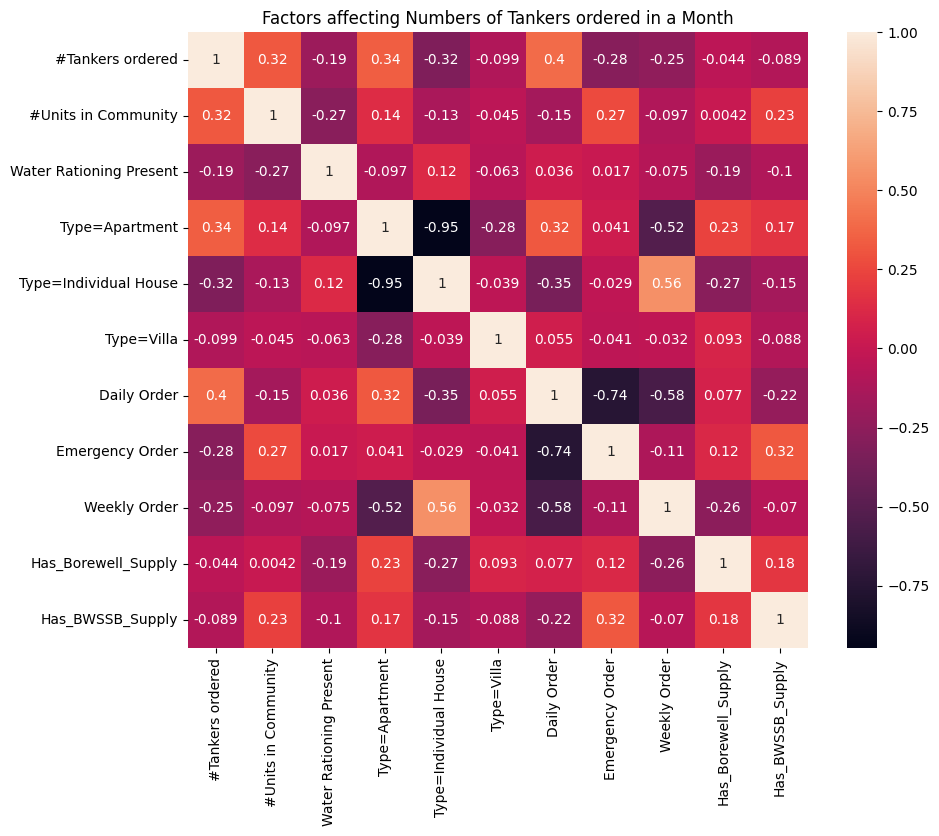

In [446]:
df_=df[['How many private tankers do you get per month on average?',
        'Number of units in the community', 'Do you have water rationing?',
        'Type of Community_Apartments', 
        'Type of Community_Individual Houses',
       'Type of Community_Villas',
       'Frequency of purchase of private water tanker_Daily',
       'Frequency of purchase of private water tanker_Only for Emergency',
       'Frequency of purchase of private water tanker_Weekly',
       'Has_Borewell_Supply', 
       'Has_BWSSB_Supply']]
df_.rename(columns={'How many private tankers do you get per month on average?':"#Tankers ordered",'Number of units in the community':"#Units in Community",'Do you have water rationing?':"Water Rationing Present",'Type of Community_Apartments':'Type=Apartment','Type of Community_Individual Houses':'Type=Individual House','Type of Community_Villas':'Type=Villa','Frequency of purchase of private water tanker_Daily':'Daily Order',
       'Frequency of purchase of private water tanker_Only for Emergency':'Emergency Order',
       'Frequency of purchase of private water tanker_Weekly':"Weekly Order"},inplace=True)
plt.figure(figsize=(10,8))
plt.title("Factors affecting Numbers of Tankers ordered in a Month")
sns.heatmap(df_.corr(numeric_only=True),annot=True)

## Regression models

### Target = Total Cost spent on Water Tankers



In [394]:
X = df.drop(columns=["What is your community's monthly expense on water?"])
y = df["What is your community's monthly expense on water?"]

In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Using Linear Regression Model

In [396]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [397]:
y_pred = model.predict(X_test)

In [398]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics - Before: ")
print(f'Linear Regression - Mean Squared Error: {mse}')
print(f'Linear Regression - R^2 Score         : {r2}')

Model Performance Metrics - Before: 
Linear Regression - Mean Squared Error: 368143541652.2281
Linear Regression - R^2 Score         : 0.013865289863377983


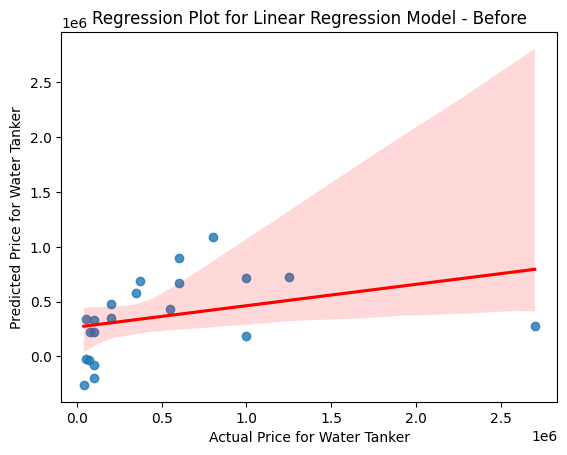

In [399]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Price for Water Tanker')
plt.ylabel('Predicted Price for Water Tanker')
plt.title('Regression Plot for Linear Regression Model - Before')
plt.show()

#### Using Random Forest Regressor model

In [400]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [401]:
y_pred_rf = rf_model.predict(X_test)

In [402]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Model Performance Metrics - Before")
print(f'Random Forest Model - Mean Squared Error: {mse_rf}')
print(f'Random Forest Model - R^2 Score         : {r2_rf}')

Model Performance Metrics - Before
Random Forest Model - Mean Squared Error: 431469767900.2649
Random Forest Model - R^2 Score         : -0.15576471229525413


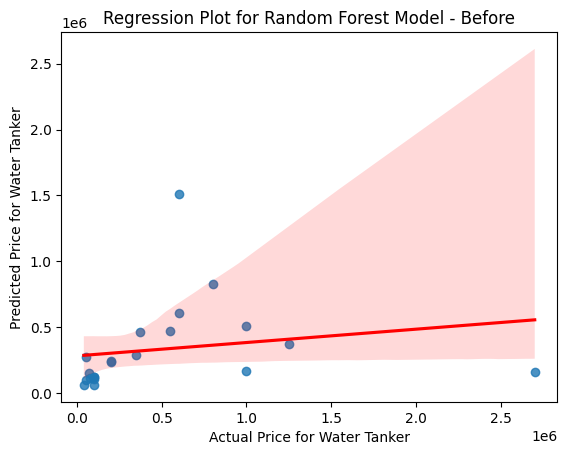

In [403]:
sns.regplot(x=y_test, y=y_pred_rf, line_kws={"color": "red"})
plt.xlabel('Actual Price for Water Tanker')
plt.ylabel('Predicted Price for Water Tanker')
plt.title('Regression Plot for Random Forest Model - Before')
plt.show()

#### Finding out reason for less accuracy

Text(0, 0.5, 'Spread')

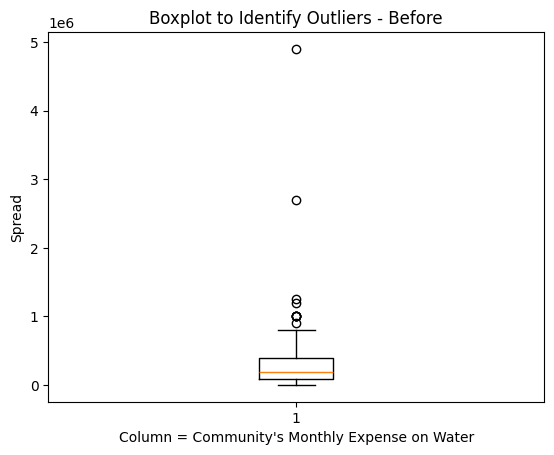

In [404]:
plt.boxplot(df["What is your community's monthly expense on water?"])
plt.title('Boxplot to Identify Outliers - Before')
plt.xlabel("Column = Community's Monthly Expense on Water")
plt.ylabel("Spread")

Text(0, 0.5, 'Monthly Expense on Water (x10 Lakh)')

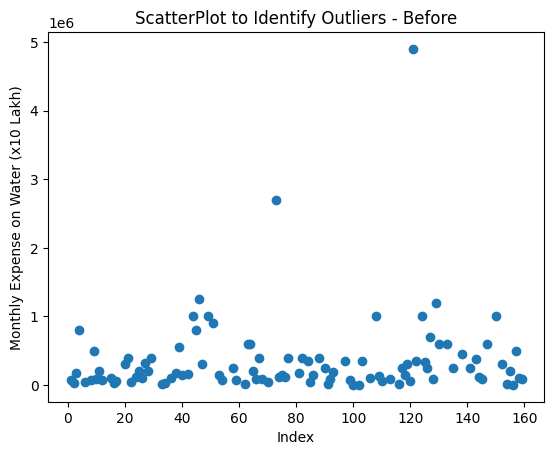

In [405]:
plt.scatter(df.index,df["What is your community's monthly expense on water?"])
plt.title('ScatterPlot to Identify Outliers - Before')
plt.xlabel("Index")
plt.ylabel("Monthly Expense on Water (x10 Lakh)")

Custom Function to remove outliers from desired column

In [406]:
def remove_outliers(dataframe,column):
  df = dataframe.copy()
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3-q1

  df = df[(df[column]>=q1-(1.5*iqr))&(df[column]<=q3+(1.5*iqr))]
  return df

Removing Outliers

In [407]:
df=remove_outliers(df,"What is your community's monthly expense on water?")

Text(0, 0.5, 'Spread')

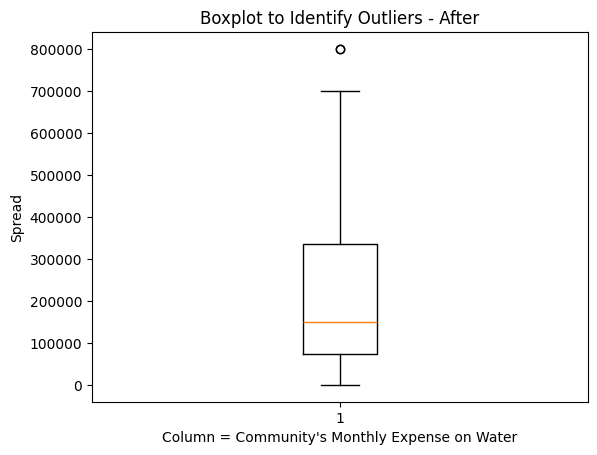

In [408]:
plt.boxplot(df["What is your community's monthly expense on water?"])
plt.title('Boxplot to Identify Outliers - After')
plt.xlabel("Column = Community's Monthly Expense on Water")
plt.ylabel("Spread")

Text(0, 0.5, 'Monthly Expense on Water')

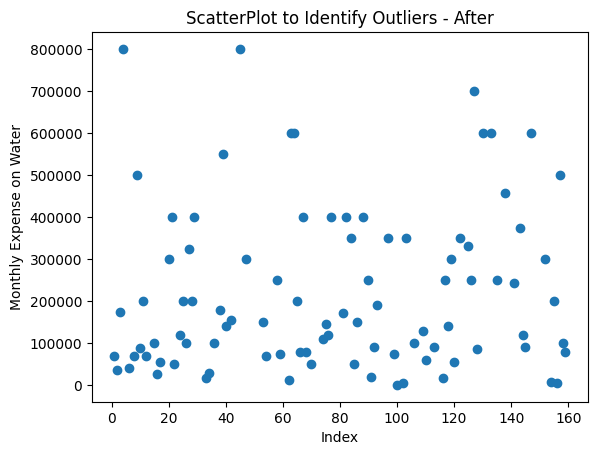

In [409]:
plt.scatter(df.index,df["What is your community's monthly expense on water?"])
plt.title('ScatterPlot to Identify Outliers - After')
plt.xlabel("Index")
plt.ylabel("Monthly Expense on Water")

#### Re-Training the Linear Regression Model

In [410]:
X = df.drop(columns=["What is your community's monthly expense on water?"])
Y = df["What is your community's monthly expense on water?"]

In [411]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [412]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [413]:
model.score(x_test,y_test)

0.8023590475120868

In [414]:
y_pred = model.predict(x_test)

In [415]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance Metrics - After: ")
print(f'Linear Regression - Mean Squared Error: {mse}')
print(f'Linear Regression - R^2 Score         : {r2}')

Model Performance Metrics - After: 
Linear Regression - Mean Squared Error: 7855747873.0957575
Linear Regression - R^2 Score         : 0.8023590475120868


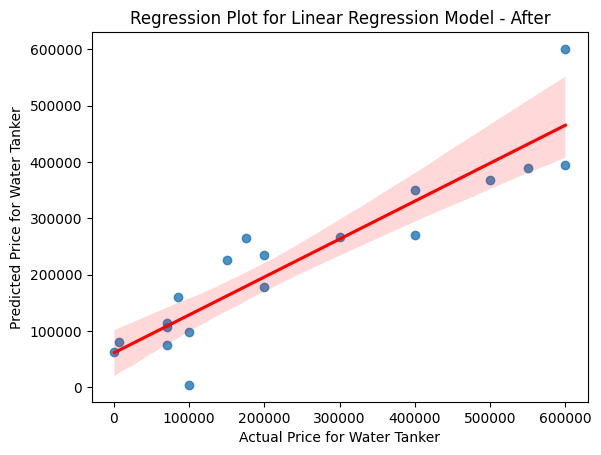

In [416]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Price for Water Tanker')
plt.ylabel('Predicted Price for Water Tanker')
plt.title('Regression Plot for Linear Regression Model - After')
plt.show()

#### Re-Training the Random Forest Regression Model

In [417]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [418]:
model.score(x_test,y_test)

0.7111135658853454

In [419]:
y_pred = model.predict(x_test)

In [420]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance Metrics - After: ")
print(f"Random Forest - Mean Squared Error: {mse}")
print(f'Random Forest - R^2 Score         : {r2}')

Model Performance Metrics - After: 
Random Forest - Mean Squared Error: 11482534170.144737
Random Forest - R^2 Score         : 0.7111135658853454


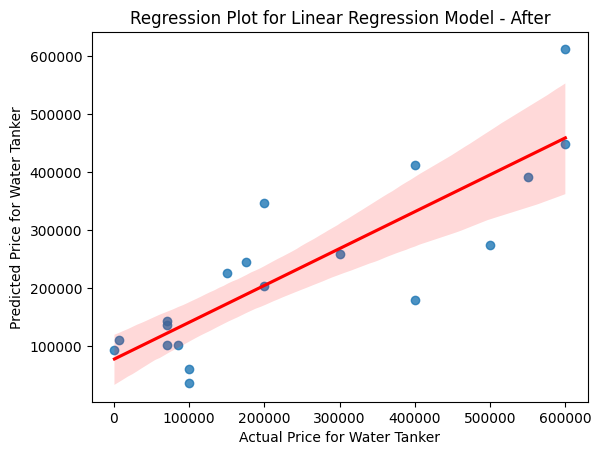

In [421]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel('Actual Price for Water Tanker')
plt.ylabel('Predicted Price for Water Tanker')
plt.title('Regression Plot for Linear Regression Model - After')
plt.show()

### Target = Number of Tankers ordered in a Month

In [422]:
df.drop(columns=['How much do you pay for a single tanker of water?', 'Your area Pincode',"What is your community's monthly expense on water?",
       'How much were you paying for the same tanker of water a year back (Feb 2023)?'],inplace=True)

In [423]:
df=remove_outliers(df,'How many private tankers do you get per month on average?')

In [424]:
X=df.drop(columns=['How many private tankers do you get per month on average?'])
Y=df['How many private tankers do you get per month on average?']

In [425]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

#### Training Linear Regression Model

In [426]:
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [427]:
model.score(X,Y)

0.3753323152954616

#### Training Random Forest Regression Model

In [428]:
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.49368468934572807

## Summary

### Information about Dataset
1. "Bengaluru Water Tanker Data - 2024", taken from OpenCity - Urban Data Portal  
2. Number of Rows = 160, Number of Columns = 17  
3. Features:
    1. "Sources of water supply for your community - Borewell/BWSSB/WaterTanker"
    2. "Type of Community - Apartments/Villas/Individual Houses"
    3. "Number of units in the community"
    4. "Do you have water rationing?"
4. Target Variables = "What is your community's monthly expense on water" & "How many private tankers do you get per month on average?"  
5. Link to Dataset = https://data.opencity.in/dataset/bengaluru-tanker-water-data/resource/water-tanker-data-%282024%29
6. There were many other potentially important features like 'Do you use treated STP water for flushing/gardening?', 'Number of dry days in the past year?', 'Has the supply of water from BWSSB changed during the last one year' and many others, but all of them were empty with no data points, hence we had to drop them from the dataset. If these columns had values, we believe this would have a strong impact on our Target Variables

### Expectations
1. According to Literature Review done and inputs from Faculty Mentor, we expect Random Forest Regression Model to perform better than Linear Regression Models in scenarios dealing with Water Studies
2. We Expect features like 'Reuse and Recycling of Water', 'Number of Dry Days', 'Change in supply of water from Government', etc to have prominent impact on the Target variable.
3. We Expect having Borewell and a BWSSB Connection to have negative impact on Target variable.

### Pre-Processing work Done
1. Two columns ('If you don't get water from tankers, what do you rely on for water needs?','Do you use treated STP water for flushing/gardening?') were found to be completely empty, dropped them
2. Rows with Partial NaN values were dropped due to no proper data to fill/replace them
3. Columns ("Number of units in the community","Do you have water rationing?","What is your community's monthly expense on water?") with Numerical values were found as 'object' types. Values were typecasted as required
4. Three categorical columns ('Type of Community', 'Frequency of purchase of private water tanker') were Nominal in nature, hence applied One-Hot Encoding to those
5. Two Columns ('Has_Borewell_Supply','Has_BWSSB_Supply') were Boolean type, converted them to Binary (0,1) type

### Correlation Analysis
1. The Target Variable of Interest is "What is your community's monthly expense on water", but it is very obvious that the Monthly expense on Water Tankers is directly proportional to "How many private tankers do you get per month" which is our second Target variable of interest
2. We analysed correlation of our Second Target variable with all the other Numeric columns except the 'Monthly expense on Water' because that will have highest correlation and disturb the results
3. By visualizing the Correlation matrix using a Heatmap, we observed that:
    1. 'Number of Tankers ordered in a Month' has highest positive correlation (60%) with 'Number of Units in the Community' which is obvious and understandable.
    2. Next highest positive correlation (30% and 20%) is with 'Frequency of Water Tanker Purchase - Daily' and 'Type of Community - Apartments'. This is also understandable since Apartments have a lot of units and members staying, increasing demand for water and purchasing the water tanker daily obviously results in more tankers being ordered in a month. On the flip side, Individual Houses and Villa Houses have negative correlation. It can be justified as Individual houses and Villas contain less number of members, hence less demand for water.
    3. Expectedly, 'Water Rationing' has negative correlation.
    4. The Most Interesting Observation from the Correlation analysis is that the features 'Has_BWSSB_Supply' and 'Has_Borewell_Supply' have very negligible/no correlation with Number of Tankers Ordered. We expected it to have a negative correlation since Having Primary Water sources like Borewell and BWSSB would ensure no need to order Water Tankers, but that was not the case. Possible explanation could be that the Borewells dried up and Govt. reduced supply of water, hence the communities were forced to order Water Tankers. This indicates an alarming point about low water levels (potentially due to low rainfall) and harsh summers experienced by Bengaluru in 2024.

### Predictive Models

#### Target = Total Cost spent on Water Tanker in a Month
1. Linear Regression Model gave accuracy of 0.01 and Random Forest Regression Model gave accuracy of -0.15
2. The Cause for Low Accuracy scores was studied and the reason was identified to be Outliers
3. Outliers were removed using the InterQuartile Range (IQR) method and model was re-trained. New Linear Regression Model gave accuracy of 0.80 and Random Forest Regression Model gave accuracy of 0.71

#### Target = Number of Tankers ordered in a Month
1. Applying learnings from previous case, outliers were dropped and then the model was trained.
2. Linear Regression Model gave accuracy of 0.37 and Random Forest Regression Model gave accuracy of 0.39

### Reality
1. Linear Regression and Random Forest Regression, both models performed equally. As volume of data increases, we might see a difference
2. We couldn't verify the impact of features we thought to have impact on Target Variable as the Data was Incomplete and Inconsistent
3. The Expectation of Borewell and BWSSB connection having negative impact on target variable proved to be wrong. This potentially explains the low water levels (potentially due to low rainfall) and harsh summers experienced by Bengaluru in 2024
